In [2]:
%pip install matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 9.3 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.9/113.9 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.4/253.4 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.3/65.3 kB 5.3 MB/s eta 0:00:00
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 10.1 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import des bibliothèques essentielles
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configuration de l'affichage
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
sns.set_style("whitegrid")

print("✅ Bibliothèques importées avec succès")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

✅ Bibliothèques importées avec succès
Pandas version: 2.2.3
NumPy version: 1.24.4


In [6]:
# Définir les chemins des fichiers
data_path = "data/"  # Ajuste le chemin si nécessaire

# Chargement des données CSV
print("📁 Chargement des datasets...")
print("-" * 50)

# 1. Transactions d'entraînement
transactions_train = pd.read_csv(data_path + "transactions_train.csv")
print(f"✓ transactions_train.csv chargé : {transactions_train.shape[0]} lignes, {transactions_train.shape[1]} colonnes")

# 2. Données des cartes
cards_data = pd.read_csv(data_path + "cards_data.csv")
print(f"✓ cards_data.csv chargé : {cards_data.shape[0]} lignes, {cards_data.shape[1]} colonnes")

# 3. Données des utilisateurs
users_data = pd.read_csv(data_path + "users_data.csv")
print(f"✓ users_data.csv chargé : {users_data.shape[0]} lignes, {users_data.shape[1]} colonnes")

# 4. Transactions d'évaluation (sans labels)
evaluation_features = pd.read_csv(data_path + "evaluation_features.csv")
print(f"✓ evaluation_features.csv chargé : {evaluation_features.shape[0]} lignes, {evaluation_features.shape[1]} colonnes")

print("-" * 50)

# Chargement des fichiers JSON
# 5. Labels de fraude
with open(data_path + "train_fraud_labels.json", 'r') as f:
    train_fraud_labels = json.load(f)
print(f"✓ train_fraud_labels.json chargé : {len(train_fraud_labels)} labels")

# 6. Codes MCC (Merchant Category Codes)
with open(data_path + "mcc_codes.json", 'r') as f:
    mcc_codes = json.load(f)
print(f"✓ mcc_codes.json chargé : {len(mcc_codes)} codes MCC")

print("-" * 50)
print("✅ Tous les datasets ont été chargés avec succès !")

📁 Chargement des datasets...
--------------------------------------------------
✓ transactions_train.csv chargé : 210000 lignes, 12 colonnes
✓ cards_data.csv chargé : 6146 lignes, 13 colonnes
✓ users_data.csv chargé : 2000 lignes, 14 colonnes
✓ evaluation_features.csv chargé : 90000 lignes, 12 colonnes
--------------------------------------------------
✓ train_fraud_labels.json chargé : 1 labels
✓ mcc_codes.json chargé : 109 codes MCC
--------------------------------------------------
✅ Tous les datasets ont été chargés avec succès !


In [8]:
print("📋 Structure de transactions_train.csv")
print("-" * 50)

# Info de base
print(f"Dimensions : {transactions_train.shape}")
print(f"\nColonnes : {list(transactions_train.columns)}")

# Types de données
print(f"\nTypes de données :")
print(transactions_train.dtypes)

# Aperçu des premières lignes
print(f"\n🔍 Premières 3 lignes :")
print(transactions_train.head(3))

# Valeurs manquantes
missing = transactions_train.isnull().sum()
if missing.sum() > 0:
    print(f"\n⚠️ Valeurs manquantes :")
    print(missing[missing > 0])
else:
    print(f"\n✅ Aucune valeur manquante")

# Statistiques de base pour les colonnes numériques
print(f"\n📊 Statistiques de base :")
print(transactions_train.describe())

📋 Structure de transactions_train.csv
--------------------------------------------------
Dimensions : (210000, 12)

Colonnes : ['transaction_id', 'date', 'client_id', 'card_id', 'amount', 'use_chip', 'merchant_id', 'merchant_city', 'merchant_state', 'zip', 'mcc', 'errors']

Types de données :
transaction_id      int64
date               object
client_id           int64
card_id             int64
amount             object
use_chip           object
merchant_id         int64
merchant_city      object
merchant_state     object
zip               float64
mcc                 int64
errors             object
dtype: object

🔍 Premières 3 lignes :
   transaction_id                 date  client_id  card_id  amount  \
0        19765990  2017-07-07 09:53:00       1581     2519  $12.35   
1        22160255  2018-11-26 17:44:00       1862     4049  $58.29   
2        17566794  2016-03-26 12:42:00       1967     3367  $11.03   

           use_chip  merchant_id merchant_city merchant_state       zip   m

In [9]:
print("🔍 Exploration corrigée des labels de fraude")
print("-" * 50)

# Extraire les labels depuis la structure imbriquée
fraud_labels_dict = train_fraud_labels.get('target', train_fraud_labels)
print(f"Nombre total de transactions avec labels : {len(fraud_labels_dict)}")

# Convertir en DataFrame pour faciliter l'analyse
fraud_df = pd.DataFrame(list(fraud_labels_dict.items()), columns=['transaction_id', 'fraud_label'])
fraud_df['transaction_id'] = fraud_df['transaction_id'].astype(int)

# Compter les fraudes
fraud_count = (fraud_df['fraud_label'] == 'Yes').sum()
non_fraud_count = (fraud_df['fraud_label'] == 'No').sum()

print(f"\n📊 Distribution des labels de fraude :")
print(f"   - Transactions normales ('No') : {non_fraud_count} ({non_fraud_count/len(fraud_df)*100:.2f}%)")
print(f"   - Transactions frauduleuses ('Yes') : {fraud_count} ({fraud_count/len(fraud_df)*100:.2f}%)")
print(f"   - Taux de fraude : {fraud_count/len(fraud_df)*100:.4f}%")

print(f"\n🔍 Échantillon des labels :")
print(fraud_df.head(10))

# Vérifier que tous les transaction_id du train ont un label
train_ids = set(transactions_train['transaction_id'])
label_ids = set(fraud_df['transaction_id'])
print(f"\n✅ Transactions dans train : {len(train_ids)}")
print(f"✅ Transactions avec labels : {len(label_ids)}")
print(f"✅ Transactions communes : {len(train_ids.intersection(label_ids))}")

🔍 Exploration corrigée des labels de fraude
--------------------------------------------------
Nombre total de transactions avec labels : 210000

📊 Distribution des labels de fraude :
   - Transactions normales ('No') : 209685 (99.85%)
   - Transactions frauduleuses ('Yes') : 315 (0.15%)
   - Taux de fraude : 0.1500%

🔍 Échantillon des labels :
   transaction_id fraud_label
0        19765990          No
1        22160255          No
2        17566794          No
3        17318690          No
4        20994060          No
5        20501200          No
6        18454176          No
7        21998064          No
8        18977227          No
9        17244867          No

✅ Transactions dans train : 210000
✅ Transactions avec labels : 210000
✅ Transactions communes : 210000


In [10]:
print("🧹 Nettoyage des données de transactions_train")
print("-" * 50)

# Créer une copie pour le nettoyage
train_df = transactions_train.copy()

# 1. Convertir les montants (enlever le $)
print("1. Conversion des montants...")
train_df['amount_clean'] = train_df['amount'].str.replace('$', '').astype(float)
print(f"   ✓ Montants convertis : min=${train_df['amount_clean'].min():.2f}, max=${train_df['amount_clean'].max():.2f}")

# 2. Analyser la colonne 'use_chip'
print("\n2. Analyse de 'use_chip' :")
print(f"   Valeurs uniques : {train_df['use_chip'].unique()}")
print(f"   Distribution :")
print(train_df['use_chip'].value_counts())

# 3. Analyser la colonne 'errors'
print("\n3. Analyse de 'errors' :")
unique_errors = train_df['errors'].dropna().unique()
print(f"   Nombre de valeurs uniques (hors NaN) : {len(unique_errors)}")
if len(unique_errors) <= 10:
    print(f"   Valeurs : {unique_errors}")
else:
    print(f"   Échantillon : {unique_errors[:10]}")
print(f"   Distribution des valeurs non-nulles :")
print(train_df['errors'].value_counts().head(10))

# 4. Convertir la colonne date
print("\n4. Conversion des dates...")
train_df['datetime'] = pd.to_datetime(train_df['date'])
train_df['year'] = train_df['datetime'].dt.year
train_df['month'] = train_df['datetime'].dt.month
train_df['day'] = train_df['datetime'].dt.day
train_df['hour'] = train_df['datetime'].dt.hour
train_df['dayofweek'] = train_df['datetime'].dt.dayofweek
train_df['is_weekend'] = train_df['dayofweek'].isin([5, 6]).astype(int)

print(f"   ✓ Dates converties")
print(f"   Période : {train_df['datetime'].min()} à {train_df['datetime'].max()}")
print(f"   Années présentes : {sorted(train_df['year'].unique())}")

# 5. Afficher les statistiques sur les montants
print("\n📊 Statistiques des montants (nettoyés) :")
print(train_df['amount_clean'].describe())

🧹 Nettoyage des données de transactions_train
--------------------------------------------------
1. Conversion des montants...
   ✓ Montants convertis : min=$-500.00, max=$2775.67

2. Analyse de 'use_chip' :
   Valeurs uniques : ['Chip Transaction' 'Swipe Transaction' 'Online Transaction']
   Distribution :
use_chip
Chip Transaction      150302
Swipe Transaction      34440
Online Transaction     25258
Name: count, dtype: int64

3. Analyse de 'errors' :
   Nombre de valeurs uniques (hors NaN) : 16
   Échantillon : ['Technical Glitch' 'Insufficient Balance' 'Bad PIN' 'Bad Card Number'
 'Bad CVV' 'Bad Expiration' 'Bad Card Number,Bad Expiration' 'Bad Zipcode'
 'Bad Expiration,Insufficient Balance'
 'Insufficient Balance,Technical Glitch']
   Distribution des valeurs non-nulles :
errors
Insufficient Balance                     2005
Bad PIN                                   504
Technical Glitch                          406
Bad Card Number                           129
Bad Expiration        

In [14]:
print("💳 Exploration de cards_data.csv")
print("-" * 50)

# Info de base
print(f"Dimensions : {cards_data.shape}")
print(f"Colonnes : {list(cards_data.columns)}")

# Types de données et valeurs manquantes
print("\n📊 Info sur les données :")
print(cards_data.info())

# Aperçu
print("\n🔍 Premières 3 lignes :")
print(cards_data.head(3))

# Analyse des colonnes importantes
print("\n📈 Analyse des colonnes clés :")
print(f"   - Nombre de cartes uniques : {cards_data['card_number'].nunique()}")
print(f"   - Doublons sur card_id : {cards_data['card_number'].duplicated().sum()}")

# Vérifier la correspondance avec transactions
card_ids_in_train = transactions_train['card_id'].unique()
print(f"\n🔗 Correspondance avec transactions_train :")
print(f"   - Cartes dans transactions_train : {len(card_ids_in_train)}")
print(f"   - Cartes dans cards_data : {len(cards_data['card_number'].unique())}")
print(f"   - Cartes communes : {len(set(card_ids_in_train).intersection(set(cards_data['card_number'].unique())))}")

# Explorer les types de colonnes
print("\n📋 Types de données détaillés :")
for col in cards_data.columns:
    if cards_data[col].dtype == 'object':
        unique_vals = cards_data[col].nunique()
        print(f"   - {col}: {unique_vals} valeurs uniques")
        if unique_vals <= 10:
            print(f"     Valeurs : {cards_data[col].unique()}")

💳 Exploration de cards_data.csv
--------------------------------------------------
Dimensions : (6146, 13)
Colonnes : ['id', 'client_id', 'card_brand', 'card_type', 'card_number', 'expires', 'cvv', 'has_chip', 'num_cards_issued', 'credit_limit', 'acct_open_date', 'year_pin_last_changed', 'card_on_dark_web']

📊 Info sur les données :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6146 entries, 0 to 6145
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     6146 non-null   int64 
 1   client_id              6146 non-null   int64 
 2   card_brand             6146 non-null   object
 3   card_type              6146 non-null   object
 4   card_number            6146 non-null   int64 
 5   expires                6146 non-null   object
 6   cvv                    6146 non-null   int64 
 7   has_chip               6146 non-null   object
 8   num_cards_issued       6146 non-null   int6

In [16]:
print("👤 Exploration de users_data.csv")
print("-" * 50)

# Info de base
print(f"Dimensions : {users_data.shape}")
print(f"Colonnes : {list(users_data.columns)}")

# Types et valeurs manquantes
print("\n📊 Info sur les données :")
print(users_data.info())

# Aperçu
print("\n🔍 Premières 3 lignes :")
print(users_data.head(3))

# Analyse des colonnes importantes
print("\n📈 Analyse des colonnes clés :")
print(f"   - Nombre d'utilisateurs uniques : {users_data['id'].nunique()}")
print(f"   - Doublons sur client_id : {users_data['id'].duplicated().sum()}")

# Vérifier la correspondance avec transactions
client_ids_in_train = transactions_train['client_id'].unique()
print(f"\n🔗 Correspondance avec transactions_train :")
print(f"   - Clients dans transactions_train : {len(client_ids_in_train)}")
print(f"   - Clients dans users_data : {len(users_data['id'].unique())}")
print(f"   - Clients communs : {len(set(client_ids_in_train).intersection(set(users_data['id'].unique())))}")

# Explorer les colonnes catégorielles
print("\n📋 Colonnes catégorielles :")
for col in users_data.columns:
    if users_data[col].dtype == 'object':
        unique_vals = users_data[col].nunique()
        print(f"   - {col}: {unique_vals} valeurs uniques")
        if unique_vals <= 10:
            print(f"     Valeurs : {users_data[col].unique()}")

# Statistiques sur les colonnes numériques
print("\n📊 Statistiques numériques :")
print(users_data.describe())

👤 Exploration de users_data.csv
--------------------------------------------------
Dimensions : (2000, 14)
Colonnes : ['id', 'current_age', 'retirement_age', 'birth_year', 'birth_month', 'gender', 'address', 'latitude', 'longitude', 'per_capita_income', 'yearly_income', 'total_debt', 'credit_score', 'num_credit_cards']

📊 Info sur les données :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2000 non-null   int64  
 1   current_age        2000 non-null   int64  
 2   retirement_age     2000 non-null   int64  
 3   birth_year         2000 non-null   int64  
 4   birth_month        2000 non-null   int64  
 5   gender             2000 non-null   object 
 6   address            2000 non-null   object 
 7   latitude           2000 non-null   float64
 8   longitude          2000 non-null   float64
 9   per_capita_in

In [17]:
print("🔗 Diagnostic des relations entre datasets")
print("-" * 50)

# Vérifier si card_number dans cards_data correspond à card_id dans transactions
print("1️⃣ Relation cards_data <-> transactions_train :")
print(f"   card_id dans transactions : min={transactions_train['card_id'].min()}, max={transactions_train['card_id'].max()}")
print(f"   card_number dans cards_data : min={cards_data['card_number'].min()}, max={cards_data['card_number'].max()}")

# Peut-être que card_id dans transactions correspond à l'index/id dans cards_data ?
print(f"\n   id dans cards_data : min={cards_data['id'].min()}, max={cards_data['id'].max()}")
card_ids_trans = set(transactions_train['card_id'].unique())
card_ids_data = set(cards_data['id'].unique())
print(f"   Correspondance avec 'id' : {len(card_ids_trans.intersection(card_ids_data))} cartes communes")

# Pour les users, vérifions la relation client_id
print("\n2️⃣ Relation users_data <-> transactions_train :")
print(f"   client_id dans transactions : min={transactions_train['client_id'].min()}, max={transactions_train['client_id'].max()}")
print(f"   id dans users_data : min={users_data['id'].min()}, max={users_data['id'].max()}")

# Vérifions aussi la relation cards_data <-> users_data
print("\n3️⃣ Relation cards_data <-> users_data :")
cards_clients = set(cards_data['client_id'].unique())
users_ids = set(users_data['id'].unique())
print(f"   Clients dans cards_data : {len(cards_clients)}")
print(f"   Correspondance : {len(cards_clients.intersection(users_ids))} clients communs")

# Statistiques sur les relations
print("\n📊 Résumé des cardinalités :")
print(f"   - Transactions par client : moyenne={transactions_train.groupby('client_id').size().mean():.1f}")
print(f"   - Transactions par carte : moyenne={transactions_train.groupby('card_id').size().mean():.1f}")
print(f"   - Cartes par client dans cards_data : moyenne={cards_data.groupby('client_id').size().mean():.1f}")

🔗 Diagnostic des relations entre datasets
--------------------------------------------------
1️⃣ Relation cards_data <-> transactions_train :
   card_id dans transactions : min=0, max=6138
   card_number dans cards_data : min=300105541992311, max=6997197066610978

   id dans cards_data : min=0, max=6145
   Correspondance avec 'id' : 2538 cartes communes

2️⃣ Relation users_data <-> transactions_train :
   client_id dans transactions : min=0, max=1997
   id dans users_data : min=0, max=1999

3️⃣ Relation cards_data <-> users_data :
   Clients dans cards_data : 2000
   Correspondance : 2000 clients communs

📊 Résumé des cardinalités :
   - Transactions par client : moyenne=246.5
   - Transactions par carte : moyenne=82.7
   - Cartes par client dans cards_data : moyenne=3.1


In [18]:
print("🔄 Fusion des datasets")
print("-" * 50)

# Créer une copie propre de transactions_train avec les labels
merged_df = train_df.copy()

# 1. Ajouter les labels de fraude
print("1️⃣ Ajout des labels de fraude...")
fraud_labels_dict = train_fraud_labels.get('target', train_fraud_labels)
merged_df['is_fraud'] = merged_df['transaction_id'].astype(str).map(fraud_labels_dict)
merged_df['is_fraud'] = (merged_df['is_fraud'] == 'Yes').astype(int)
print(f"   ✓ Labels ajoutés : {merged_df['is_fraud'].sum()} fraudes sur {len(merged_df)} transactions")

# 2. Fusionner avec users_data (client_id = id dans users_data)
print("\n2️⃣ Fusion avec users_data...")
users_clean = users_data.rename(columns={'id': 'client_id'})
# Nettoyer les colonnes monétaires
for col in ['per_capita_income', 'yearly_income', 'total_debt']:
    users_clean[col] = users_clean[col].str.replace('$', '').str.replace(',', '').astype(float)

merged_df = merged_df.merge(users_clean, on='client_id', how='left')
print(f"   ✓ Fusion effectuée : {merged_df['current_age'].notna().sum()} transactions avec info utilisateur")

# 3. Fusionner avec cards_data (card_id dans transactions = id dans cards_data)
print("\n3️⃣ Fusion avec cards_data...")
cards_clean = cards_data.rename(columns={'id': 'card_id', 'client_id': 'card_client_id'})
# Nettoyer credit_limit
cards_clean['credit_limit'] = cards_clean['credit_limit'].str.replace('$', '').str.replace(',', '').astype(float)
# Convertir has_chip
cards_clean['has_chip'] = (cards_clean['has_chip'] == 'YES').astype(int)

merged_df = merged_df.merge(cards_clean, on='card_id', how='left')
print(f"   ✓ Fusion effectuée : {merged_df['card_brand'].notna().sum()} transactions avec info carte")

# 4. Ajouter les descriptions MCC
print("\n4️⃣ Ajout des descriptions MCC...")
merged_df['mcc_description'] = merged_df['mcc'].astype(str).map(mcc_codes)
print(f"   ✓ Descriptions ajoutées : {merged_df['mcc_description'].notna().sum()} transactions avec description MCC")

# Résumé final
print("\n📊 Résumé du dataset fusionné :")
print(f"   - Dimensions : {merged_df.shape}")
print(f"   - Colonnes ajoutées : {len(merged_df.columns) - len(train_df.columns)}")
print(f"   - Taux de remplissage pour info utilisateur : {merged_df['current_age'].notna().sum()/len(merged_df)*100:.1f}%")
print(f"   - Taux de remplissage pour info carte : {merged_df['card_brand'].notna().sum()/len(merged_df)*100:.1f}%")

# Afficher les colonnes disponibles
print("\n📋 Colonnes disponibles après fusion :")
print(list(merged_df.columns))

🔄 Fusion des datasets
--------------------------------------------------
1️⃣ Ajout des labels de fraude...
   ✓ Labels ajoutés : 315 fraudes sur 210000 transactions

2️⃣ Fusion avec users_data...
   ✓ Fusion effectuée : 210000 transactions avec info utilisateur

3️⃣ Fusion avec cards_data...
   ✓ Fusion effectuée : 210000 transactions avec info carte

4️⃣ Ajout des descriptions MCC...
   ✓ Descriptions ajoutées : 210000 transactions avec description MCC

📊 Résumé du dataset fusionné :
   - Dimensions : (210000, 47)
   - Colonnes ajoutées : 27
   - Taux de remplissage pour info utilisateur : 100.0%
   - Taux de remplissage pour info carte : 100.0%

📋 Colonnes disponibles après fusion :
['transaction_id', 'date', 'client_id', 'card_id', 'amount', 'use_chip', 'merchant_id', 'merchant_city', 'merchant_state', 'zip', 'mcc', 'errors', 'amount_clean', 'datetime', 'year', 'month', 'day', 'hour', 'dayofweek', 'is_weekend', 'is_fraud', 'current_age', 'retirement_age', 'birth_year', 'birth_month'

In [19]:
print("🔍 Analyse détaillée des patterns de fraude")
print("-" * 50)

# 1. Distribution des fraudes par caractéristiques
print("1️⃣ Taux de fraude par type de transaction :")
fraud_by_chip = merged_df.groupby('use_chip')['is_fraud'].agg(['mean', 'sum', 'count'])
fraud_by_chip['fraud_rate_%'] = fraud_by_chip['mean'] * 100
print(fraud_by_chip)

print("\n2️⃣ Taux de fraude par type de carte :")
fraud_by_card_type = merged_df.groupby('card_type')['is_fraud'].agg(['mean', 'sum', 'count'])
fraud_by_card_type['fraud_rate_%'] = fraud_by_card_type['mean'] * 100
print(fraud_by_card_type)

print("\n3️⃣ Top 10 MCC avec le plus de fraudes :")
fraud_by_mcc = merged_df.groupby(['mcc', 'mcc_description'])['is_fraud'].agg(['mean', 'sum', 'count'])
fraud_by_mcc = fraud_by_mcc[fraud_by_mcc['count'] >= 100]  # Filtrer les MCC avec peu de transactions
fraud_by_mcc['fraud_rate_%'] = fraud_by_mcc['mean'] * 100
print(fraud_by_mcc.sort_values('fraud_rate_%', ascending=False).head(10))

print("\n4️⃣ Statistiques sur les montants :")
print("Transactions normales :")
print(merged_df[merged_df['is_fraud']==0]['amount_clean'].describe())
print("\nTransactions frauduleuses :")
print(merged_df[merged_df['is_fraud']==1]['amount_clean'].describe())

print("\n5️⃣ Distribution temporelle des fraudes :")
fraud_by_hour = merged_df.groupby('hour')['is_fraud'].mean() * 100
print("Heures avec le plus de fraudes (%) :")
print(fraud_by_hour.sort_values(ascending=False).head(5))

# Identifier les clients fraudeurs
print("\n6️⃣ Analyse des clients fraudeurs :")
fraud_clients = merged_df[merged_df['is_fraud']==1]['client_id'].unique()
print(f"   - Nombre total de clients : {merged_df['client_id'].nunique()}")
print(f"   - Nombre de clients avec au moins 1 fraude : {len(fraud_clients)}")
print(f"   - % de clients fraudeurs : {len(fraud_clients)/merged_df['client_id'].nunique()*100:.2f}%")

# Fraudes multiples par client
fraud_per_client = merged_df[merged_df['is_fraud']==1].groupby('client_id').size()
print(f"   - Clients avec 1 fraude : {(fraud_per_client==1).sum()}")
print(f"   - Clients avec 2+ fraudes : {(fraud_per_client>=2).sum()}")
print(f"   - Max fraudes par client : {fraud_per_client.max()}")

🔍 Analyse détaillée des patterns de fraude
--------------------------------------------------
1️⃣ Taux de fraude par type de transaction :
                    mean  sum   count  fraud_rate_%
use_chip                                           
Chip Transaction   0.001  111  150302         0.074
Online Transaction 0.007  185   25258         0.732
Swipe Transaction  0.001   19   34440         0.055

2️⃣ Taux de fraude par type de carte :
                 mean  sum   count  fraud_rate_%
card_type                                       
Credit          0.001   87   60431         0.144
Debit           0.001  198  134357         0.147
Debit (Prepaid) 0.002   30   15212         0.197

3️⃣ Top 10 MCC avec le plus de fraudes :
                                                   mean  sum  count  \
mcc  mcc_description                                                  
5732 Electronics Stores                           0.095   12    126   
3389 Non-Precious Metal Services                  0.046    8 

In [20]:
print("❄️ Analyse pour le problème de Cold-Start")
print("-" * 50)

# 1. Analyser le dataset d'évaluation
print("1️⃣ Analyse d'evaluation_features.csv :")
print(f"   - Dimensions : {evaluation_features.shape}")
print(f"   - Colonnes : {list(evaluation_features.columns)}")

# Vérifier les clients dans train vs eval
eval_client_ids = set(evaluation_features['client_id'].unique())
train_client_ids = set(merged_df['client_id'].unique())
print(f"\n2️⃣ Analyse des clients (cold-start) :")
print(f"   - Clients dans train : {len(train_client_ids)}")
print(f"   - Clients dans eval : {len(eval_client_ids)}")
print(f"   - Clients communs : {len(train_client_ids.intersection(eval_client_ids))}")
print(f"   - Nouveaux clients dans eval : {len(eval_client_ids - train_client_ids)}")
print(f"   ⚠️ % de nouveaux clients : {len(eval_client_ids - train_client_ids)/len(eval_client_ids)*100:.1f}%")

# Vérifier si les fraudeurs du train sont dans eval
fraud_train_clients = set(merged_df[merged_df['is_fraud']==1]['client_id'].unique())
print(f"\n3️⃣ Vérification du cold-start pour fraudeurs :")
print(f"   - Clients fraudeurs dans train : {len(fraud_train_clients)}")
print(f"   - Clients fraudeurs du train présents dans eval : {len(fraud_train_clients.intersection(eval_client_ids))}")
print(f"   ✅ Confirmation : Aucun fraudeur du train n'est dans l'eval" if len(fraud_train_clients.intersection(eval_client_ids)) == 0 else f"   ⚠️ {len(fraud_train_clients.intersection(eval_client_ids))} fraudeurs du train sont dans eval!")

# 4. Créer des features génériques pour le cold-start
print("\n4️⃣ Features candidates pour le cold-start :")
print("   ✓ Features de transaction : amount, mcc, use_chip, merchant_*, errors")
print("   ✓ Features temporelles : hour, day, dayofweek, is_weekend")
print("   ✓ Features dérivées : amount_zscore par MCC, velocity (si possible)")
print("   ✓ Features de risque : merchant risk score, time risk score")
print("   ✓ Features agrégées globales : taux de fraude par MCC, par heure, etc.")

# 5. Analyser la distribution des features entre train et eval
print("\n5️⃣ Comparaison train vs eval (pour drift detection) :")
# Nettoyer amount dans eval
eval_features = evaluation_features.copy()
eval_features['amount_clean'] = eval_features['amount'].str.replace('$', '').astype(float)

print(f"   Montants - Train : mean=${merged_df['amount_clean'].mean():.2f}, std=${merged_df['amount_clean'].std():.2f}")
print(f"   Montants - Eval : mean=${eval_features['amount_clean'].mean():.2f}, std=${eval_features['amount_clean'].std():.2f}")

# Distribution des MCC
top_mcc_train = merged_df['mcc'].value_counts().head(5)
top_mcc_eval = eval_features['mcc'].value_counts().head(5)
print(f"\n   Top 5 MCC dans train : {list(top_mcc_train.index)}")
print(f"   Top 5 MCC dans eval : {list(top_mcc_eval.index)}")

❄️ Analyse pour le problème de Cold-Start
--------------------------------------------------
1️⃣ Analyse d'evaluation_features.csv :
   - Dimensions : (90000, 12)
   - Colonnes : ['transaction_id', 'date', 'client_id', 'card_id', 'amount', 'use_chip', 'merchant_id', 'merchant_city', 'merchant_state', 'zip', 'mcc', 'errors']

2️⃣ Analyse des clients (cold-start) :
   - Clients dans train : 852
   - Clients dans eval : 362
   - Clients communs : 0
   - Nouveaux clients dans eval : 362
   ⚠️ % de nouveaux clients : 100.0%

3️⃣ Vérification du cold-start pour fraudeurs :
   - Clients fraudeurs dans train : 221
   - Clients fraudeurs du train présents dans eval : 0
   ✅ Confirmation : Aucun fraudeur du train n'est dans l'eval

4️⃣ Features candidates pour le cold-start :
   ✓ Features de transaction : amount, mcc, use_chip, merchant_*, errors
   ✓ Features temporelles : hour, day, dayofweek, is_weekend
   ✓ Features dérivées : amount_zscore par MCC, velocity (si possible)
   ✓ Features de r

In [21]:
print("🔧 Création de features pour le cold-start")
print("-" * 50)

def create_cold_start_features(df, is_train=True):
    """
    Créer des features qui ne dépendent pas de l'identité du client
    """
    df_feat = df.copy()
    
    # 1. Features de risque par MCC (calculées sur le train)
    if is_train:
        # Calculer les statistiques par MCC sur le train
        global mcc_risk_stats  # Pour réutiliser dans eval
        mcc_risk_stats = df.groupby('mcc').agg({
            'is_fraud': ['mean', 'count'],
            'amount_clean': ['mean', 'std', 'median']
        }).round(4)
        mcc_risk_stats.columns = ['_'.join(col).strip() for col in mcc_risk_stats.columns]
        mcc_risk_stats = mcc_risk_stats.to_dict('index')
    
    # Appliquer les stats MCC
    df_feat['mcc_fraud_rate'] = df_feat['mcc'].map(lambda x: mcc_risk_stats.get(x, {}).get('is_fraud_mean', 0.0015))
    df_feat['mcc_tx_count'] = df_feat['mcc'].map(lambda x: mcc_risk_stats.get(x, {}).get('is_fraud_count', 100))
    df_feat['mcc_amount_mean'] = df_feat['mcc'].map(lambda x: mcc_risk_stats.get(x, {}).get('amount_clean_mean', 42.5))
    df_feat['mcc_amount_std'] = df_feat['mcc'].map(lambda x: mcc_risk_stats.get(x, {}).get('amount_clean_std', 80.0))
    
    # 2. Z-score du montant par MCC
    df_feat['amount_zscore_by_mcc'] = (df_feat['amount_clean'] - df_feat['mcc_amount_mean']) / df_feat['mcc_amount_std'].replace(0, 1)
    
    # 3. Features temporelles de risque
    if is_train:
        global hour_risk_stats
        hour_risk_stats = df.groupby('hour')['is_fraud'].mean().to_dict()
    
    df_feat['hour_fraud_rate'] = df_feat['hour'].map(lambda x: hour_risk_stats.get(x, 0.0015))
    
    # 4. Features de transaction
    df_feat['is_online'] = (df_feat['use_chip'] == 'Online Transaction').astype(int)
    df_feat['is_swipe'] = (df_feat['use_chip'] == 'Swipe Transaction').astype(int)
    df_feat['has_error'] = df_feat['errors'].notna().astype(int)
    
    # 5. Indicateurs d'anomalie
    df_feat['amount_negative'] = (df_feat['amount_clean'] < 0).astype(int)
    df_feat['amount_high'] = (df_feat['amount_clean'] > 500).astype(int)
    df_feat['amount_very_high'] = (df_feat['amount_clean'] > 1000).astype(int)
    
    # 6. Combinaisons de risque
    df_feat['high_risk_mcc'] = (df_feat['mcc_fraud_rate'] > 0.01).astype(int)
    df_feat['risky_time'] = (df_feat['hour'].isin([10, 11, 12, 18])).astype(int)
    df_feat['online_high_amount'] = (df_feat['is_online'] * df_feat['amount_high']).astype(int)
    
    # 7. Features merchant (sans identité)
    if is_train:
        global merchant_risk_stats
        merchant_risk_stats = df.groupby('merchant_id')['is_fraud'].agg(['mean', 'count']).to_dict('index')
    
    df_feat['merchant_fraud_rate'] = df_feat['merchant_id'].map(
        lambda x: merchant_risk_stats.get(x, {}).get('mean', 0.0015)
    )
    df_feat['merchant_tx_count'] = df_feat['merchant_id'].map(
        lambda x: merchant_risk_stats.get(x, {}).get('count', 1)
    )
    
    print(f"✓ {len([c for c in df_feat.columns if c not in df.columns])} nouvelles features créées")
    
    return df_feat

# Appliquer sur le train
print("\n📊 Application sur le train :")
train_featured = create_cold_start_features(merged_df, is_train=True)

# Afficher les nouvelles features
new_features = [c for c in train_featured.columns if c not in merged_df.columns]
print(f"\nNouvelles features créées : {new_features[:10]}")
print(f"Total features : {len(train_featured.columns)}")

# Vérifier la corrélation avec la fraude
print("\n🎯 Top 10 features corrélées avec la fraude :")
correlations = train_featured[new_features + ['is_fraud']].corr()['is_fraud'].sort_values(ascending=False)
print(correlations.head(11)[1:])  # Skip is_fraud itself

🔧 Création de features pour le cold-start
--------------------------------------------------

📊 Application sur le train :
✓ 17 nouvelles features créées

Nouvelles features créées : ['mcc_fraud_rate', 'mcc_tx_count', 'mcc_amount_mean', 'mcc_amount_std', 'amount_zscore_by_mcc', 'hour_fraud_rate', 'is_online', 'is_swipe', 'has_error', 'amount_negative']
Total features : 64

🎯 Top 10 features corrélées avec la fraude :
merchant_fraud_rate    0.418
mcc_fraud_rate         0.166
high_risk_mcc          0.092
mcc_amount_std         0.057
is_online              0.056
mcc_amount_mean        0.048
online_high_amount     0.038
hour_fraud_rate        0.029
amount_zscore_by_mcc   0.025
risky_time             0.021
Name: is_fraud, dtype: float64


In [22]:
print("🎯 Sélection des features finales pour le modèle")
print("-" * 50)

# Features à utiliser (uniquement celles disponibles dans eval)
feature_cols = [
    # Montant
    'amount_clean', 'amount_zscore_by_mcc', 'amount_negative', 'amount_high', 'amount_very_high',
    
    # MCC
    'mcc', 'mcc_fraud_rate', 'mcc_amount_mean', 'mcc_amount_std', 'high_risk_mcc',
    
    # Temporel
    'hour', 'dayofweek', 'is_weekend', 'hour_fraud_rate', 'risky_time',
    
    # Transaction
    'is_online', 'is_swipe', 'has_error',
    
    # Merchant
    'merchant_fraud_rate', 'merchant_tx_count',
    
    # Combinaisons
    'online_high_amount'
]

# Vérifier que toutes les features existent
available_features = [f for f in feature_cols if f in train_featured.columns]
print(f"Features disponibles : {len(available_features)}/{len(feature_cols)}")

# Préparer X et y
X_train = train_featured[available_features]
y_train = train_featured['is_fraud']

print(f"\n📊 Dataset final :")
print(f"   - X_train shape : {X_train.shape}")
print(f"   - y_train shape : {y_train.shape}")
print(f"   - Taux de fraude : {y_train.mean()*100:.2f}%")

# Statistiques sur les features
print("\n📈 Statistiques des features principales :")
print(X_train[['amount_clean', 'mcc_fraud_rate', 'hour_fraud_rate', 'merchant_fraud_rate']].describe())

# Sauvegarder les colonnes pour l'évaluation
print("\n💾 Sauvegarde de la configuration :")
import pickle

config = {
    'feature_cols': available_features,
    'mcc_risk_stats': mcc_risk_stats,
    'hour_risk_stats': hour_risk_stats,
    'merchant_risk_stats': merchant_risk_stats
}

with open('model_config.pkl', 'wb') as f:
    pickle.dump(config, f)
    
print("✓ Configuration sauvegardée dans model_config.pkl")
print("✓ Prêt pour l'entraînement du modèle !")

# Afficher l'importance théorique des features (basée sur la corrélation)
print("\n🔥 Features les plus importantes (corrélation) :")
feature_importance = X_train.corrwith(y_train).abs().sort_values(ascending=False)
print(feature_importance.head(10))

🎯 Sélection des features finales pour le modèle
--------------------------------------------------
Features disponibles : 21/21

📊 Dataset final :
   - X_train shape : (210000, 21)
   - y_train shape : (210000,)
   - Taux de fraude : 0.15%

📈 Statistiques des features principales :
       amount_clean  mcc_fraud_rate  hour_fraud_rate  merchant_fraud_rate
count    210000.000      210000.000       210000.000           210000.000
mean         42.553           0.002            0.002                0.002
std          80.669           0.006            0.001                0.016
min        -500.000           0.000            0.000                0.000
25%           8.730           0.000            0.000                0.000
50%          28.170           0.001            0.002                0.000
75%          62.260           0.001            0.002                0.001
max        2775.670           0.667            0.003                1.000

💾 Sauvegarde de la configuration :
✓ Configuration

In [28]:
%pip install -U imbalanced-learn scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 19.5 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1

[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [30]:
print("⚖️ Préparation du train/validation avec split temporel (sans SMOTE)")
print("-" * 50)

from sklearn.preprocessing import StandardScaler
import numpy as np

# 1. Split temporel (80/20) basé sur la date
print("1️⃣ Split temporel (80/20) basé sur la date...")
train_featured_sorted = train_featured.sort_values('datetime')
split_index = int(len(train_featured_sorted) * 0.8)

train_data = train_featured_sorted[:split_index]
val_data = train_featured_sorted[split_index:]

X_train_split = train_data[available_features]
y_train_split = train_data['is_fraud']
X_val = val_data[available_features]
y_val = val_data['is_fraud']

print(f"   Train : {len(X_train_split)} transactions ({y_train_split.sum()} fraudes - {y_train_split.mean()*100:.2f}%)")
print(f"   Val   : {len(X_val)} transactions ({y_val.sum()} fraudes - {y_val.mean()*100:.2f}%)")
print(f"   Période train : {train_data['datetime'].min()} à {train_data['datetime'].max()}")
print(f"   Période val   : {val_data['datetime'].min()} à {val_data['datetime'].max()}")

# 2. Standardisation
print("\n2️⃣ Standardisation des features...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_split)
X_val_scaled = scaler.transform(X_val)

# 3. Alternative à SMOTE : Pondération des classes
print("\n3️⃣ Calcul des poids pour les classes déséquilibrées...")
from sklearn.utils.class_weight import compute_class_weight

classes = np.unique(y_train_split)
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=classes,
    y=y_train_split
)
class_weight_dict = dict(zip(classes, class_weights))
print(f"   Poids des classes : {class_weight_dict}")
print(f"   Ratio de pondération : 1:{class_weights[1]/class_weights[0]:.1f}")

# Pour l'entraînement, on utilisera X_train_scaled et y_train_split directement
# Les modèles utiliseront le paramètre class_weight='balanced'

# Sauvegarder le scaler
import pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print("\n✓ Scaler sauvegardé dans scaler.pkl")
print("✓ Données prêtes pour l'entraînement avec pondération des classes")

⚖️ Préparation du train/validation avec split temporel (sans SMOTE)
--------------------------------------------------
1️⃣ Split temporel (80/20) basé sur la date...
   Train : 168000 transactions (235 fraudes - 0.14%)
   Val   : 42000 transactions (80 fraudes - 0.19%)
   Période train : 2016-01-01 00:29:00 à 2018-05-26 08:27:00
   Période val   : 2018-05-26 08:34:00 à 2018-12-31 23:31:00

2️⃣ Standardisation des features...

3️⃣ Calcul des poids pour les classes déséquilibrées...
   Poids des classes : {0: 0.5007003844663667, 1: 357.4468085106383}
   Ratio de pondération : 1:713.9

✓ Scaler sauvegardé dans scaler.pkl
✓ Données prêtes pour l'entraînement avec pondération des classes


In [32]:
print("🤖 Entraînement simplifié de modèles")
print("-" * 50)

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, f1_score, confusion_matrix, precision_score, recall_score
import warnings
warnings.filterwarnings('ignore')
import pickle

# Convertir en array numpy pour éviter les problèmes
X_train_np = np.array(X_train_scaled)
X_val_np = np.array(X_val_scaled)
y_train_np = np.array(y_train_split)
y_val_np = np.array(y_val)

models = {}
results = {}

# 1. Logistic Regression (plus stable)
print("\n1️⃣ Logistic Regression...")
lr = LogisticRegression(
    class_weight='balanced',
    max_iter=2000,
    random_state=42
)
lr.fit(X_train_np, y_train_np)

# Prédictions
y_pred_lr = lr.predict(X_val_np)
y_pred_proba_lr = lr.predict_proba(X_val_np)[:, 1]

# Métriques
models['LogisticRegression'] = lr
results['LogisticRegression'] = {
    'roc_auc': roc_auc_score(y_val_np, y_pred_proba_lr),
    'precision': precision_score(y_val_np, y_pred_lr),
    'recall': recall_score(y_val_np, y_pred_lr),
    'f1': f1_score(y_val_np, y_pred_lr)
}
print(f"   ROC-AUC: {results['LogisticRegression']['roc_auc']:.4f}")
print(f"   Precision: {results['LogisticRegression']['precision']:.4f}")
print(f"   Recall: {results['LogisticRegression']['recall']:.4f}")
print(f"   F1: {results['LogisticRegression']['f1']:.4f}")

# 2. Random Forest simplifié
print("\n2️⃣ Random Forest (simplifié)...")
try:
    rf_simple = RandomForestClassifier(
        n_estimators=100,  # Réduit pour éviter les erreurs
        max_depth=10,
        class_weight='balanced',
        random_state=42,
        n_jobs=1  # Un seul job pour éviter les problèmes de parallélisation
    )
    rf_simple.fit(X_train_np, y_train_np)
    
    y_pred_rf = rf_simple.predict(X_val_np)
    y_pred_proba_rf = rf_simple.predict_proba(X_val_np)[:, 1]
    
    models['RandomForest'] = rf_simple
    results['RandomForest'] = {
        'roc_auc': roc_auc_score(y_val_np, y_pred_proba_rf),
        'precision': precision_score(y_val_np, y_pred_rf),
        'recall': recall_score(y_val_np, y_pred_rf),
        'f1': f1_score(y_val_np, y_pred_rf)
    }
    print(f"   ROC-AUC: {results['RandomForest']['roc_auc']:.4f}")
    print(f"   Precision: {results['RandomForest']['precision']:.4f}")
    print(f"   Recall: {results['RandomForest']['recall']:.4f}")
    print(f"   F1: {results['RandomForest']['f1']:.4f}")
except Exception as e:
    print(f"   Erreur avec RandomForest: {str(e)[:100]}")

# 3. Essayer LightGBM (alternative légère)
print("\n3️⃣ Essai avec LightGBM...")
try:
    !pip install lightgbm -q
    import lightgbm as lgb
    
    # Calcul du ratio pour scale_pos_weight
    scale_pos_weight = (y_train_np == 0).sum() / (y_train_np == 1).sum()
    
    lgb_model = lgb.LGBMClassifier(
        n_estimators=100,
        max_depth=10,
        learning_rate=0.1,
        scale_pos_weight=scale_pos_weight,
        random_state=42,
        verbose=-1
    )
    lgb_model.fit(X_train_np, y_train_np)
    
    y_pred_lgb = lgb_model.predict(X_val_np)
    y_pred_proba_lgb = lgb_model.predict_proba(X_val_np)[:, 1]
    
    models['LightGBM'] = lgb_model
    results['LightGBM'] = {
        'roc_auc': roc_auc_score(y_val_np, y_pred_proba_lgb),
        'precision': precision_score(y_val_np, y_pred_lgb),
        'recall': recall_score(y_val_np, y_pred_lgb),
        'f1': f1_score(y_val_np, y_pred_lgb)
    }
    print(f"   ROC-AUC: {results['LightGBM']['roc_auc']:.4f}")
    print(f"   Precision: {results['LightGBM']['precision']:.4f}")
    print(f"   Recall: {results['LightGBM']['recall']:.4f}")
    print(f"   F1: {results['LightGBM']['f1']:.4f}")
except:
    print("   LightGBM non disponible")

# Résumé des performances
print("\n" + "="*70)
print("📊 RÉSUMÉ DES PERFORMANCES")
print("="*70)
print(f"{'Modèle':20} {'ROC-AUC':>10} {'Precision':>10} {'Recall':>10} {'F1':>10}")
print("-"*70)
for model_name, metrics in results.items():
    print(f"{model_name:20} {metrics['roc_auc']:10.4f} {metrics['precision']:10.4f} "
          f"{metrics['recall']:10.4f} {metrics['f1']:10.4f}")

# Sélectionner le meilleur modèle (basé sur F1 pour équilibrer precision/recall)
best_model_name = max(results.keys(), key=lambda x: results[x]['f1'])
best_model = models[best_model_name]
print(f"\n🏆 Meilleur modèle (F1): {best_model_name} (F1={results[best_model_name]['f1']:.4f})")

# Matrice de confusion
y_best_pred = best_model.predict(X_val_np)
cm = confusion_matrix(y_val_np, y_best_pred)
print(f"\n📊 Matrice de confusion ({best_model_name}):")
print(f"              Prédit_Normal  Prédit_Fraude")
print(f"Réel_Normal       {cm[0,0]:8}      {cm[0,1]:8}")
print(f"Réel_Fraude       {cm[1,0]:8}      {cm[1,1]:8}")

# Calculer les métriques business
false_positives = cm[0,1]
false_negatives = cm[1,0] 
true_positives = cm[1,1]
print(f"\n💰 Métriques business:")
print(f"   - Fraudes détectées: {true_positives}/{true_positives+false_negatives} ({true_positives/(true_positives+false_negatives)*100:.1f}%)")
print(f"   - Fausses alertes: {false_positives} ({false_positives/len(y_val_np)*100:.2f}% des transactions)")

# Sauvegarder le meilleur modèle
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)
print(f"\n✅ Modèle '{best_model_name}' sauvegardé dans best_model.pkl")

🤖 Entraînement simplifié de modèles
--------------------------------------------------

1️⃣ Logistic Regression...
   ROC-AUC: 0.9367
   Precision: 0.0180
   Recall: 0.7000
   F1: 0.0351

2️⃣ Random Forest (simplifié)...
   Erreur avec RandomForest: Cannot convert numpy.ndarray to numpy.ndarray

3️⃣ Essai avec LightGBM...

[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
   ROC-AUC: 0.6811
   Precision: 0.0069
   Recall: 0.5000
   F1: 0.0136

📊 RÉSUMÉ DES PERFORMANCES
Modèle                  ROC-AUC  Precision     Recall         F1
----------------------------------------------------------------------
LogisticRegression       0.9367     0.0180     0.7000     0.0351
LightGBM                 0.6811     0.0069     0.5000     0.0136

🏆 Meilleur modèle (F1): LogisticRegression (F1=0.0351)

📊 Matrice de confusion (LogisticRegression):
              Prédit_Normal  Prédit_Fraude
Réel_Normal          38869          3051
Réel_Fraude   

In [33]:
print("🎯 Optimisation du seuil de décision")
print("-" * 50)

from sklearn.metrics import precision_recall_curve, f1_score
import numpy as np

# Utiliser les probabilités du meilleur modèle
best_model = models['LogisticRegression']
y_val_proba = best_model.predict_proba(X_val_np)[:, 1]

# Calculer la courbe precision-recall
precisions, recalls, thresholds = precision_recall_curve(y_val_np, y_val_proba)

# Calculer F1 pour chaque seuil
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)

# Trouver le meilleur seuil
best_threshold_idx = np.argmax(f1_scores[:-1])  # Exclure le dernier point
best_threshold = thresholds[best_threshold_idx]
best_f1 = f1_scores[best_threshold_idx]

print(f"📊 Seuil par défaut (0.5):")
print(f"   F1-Score: {results['LogisticRegression']['f1']:.4f}")
print(f"   Precision: {results['LogisticRegression']['precision']:.4f}")
print(f"   Recall: {results['LogisticRegression']['recall']:.4f}")

print(f"\n🎯 Seuil optimisé ({best_threshold:.4f}):")
print(f"   F1-Score: {best_f1:.4f}")
print(f"   Precision: {precisions[best_threshold_idx]:.4f}")
print(f"   Recall: {recalls[best_threshold_idx]:.4f}")

# Appliquer le nouveau seuil
y_pred_optimized = (y_val_proba >= best_threshold).astype(int)
cm_optimized = confusion_matrix(y_val_np, y_pred_optimized)

print(f"\n📊 Matrice de confusion avec seuil optimisé:")
print(f"              Prédit_Normal  Prédit_Fraude")
print(f"Réel_Normal       {cm_optimized[0,0]:8}      {cm_optimized[0,1]:8}")
print(f"Réel_Fraude       {cm_optimized[1,0]:8}      {cm_optimized[1,1]:8}")

print(f"\n💰 Métriques business optimisées:")
print(f"   - Fraudes détectées: {cm_optimized[1,1]}/{cm_optimized[1,0]+cm_optimized[1,1]} ({cm_optimized[1,1]/(cm_optimized[1,0]+cm_optimized[1,1])*100:.1f}%)")
print(f"   - Fausses alertes: {cm_optimized[0,1]} ({cm_optimized[0,1]/len(y_val_np)*100:.2f}% des transactions)")

# Sauvegarder le seuil optimal
optimal_threshold = best_threshold
print(f"\n✅ Seuil optimal sauvegardé: {optimal_threshold:.4f}")

🎯 Optimisation du seuil de décision
--------------------------------------------------
📊 Seuil par défaut (0.5):
   F1-Score: 0.0351
   Precision: 0.0180
   Recall: 0.7000

🎯 Seuil optimisé (1.0000):
   F1-Score: 0.4746
   Precision: 0.7368
   Recall: 0.3500

📊 Matrice de confusion avec seuil optimisé:
              Prédit_Normal  Prédit_Fraude
Réel_Normal          41910            10
Réel_Fraude             52            28

💰 Métriques business optimisées:
   - Fraudes détectées: 28/80 (35.0%)
   - Fausses alertes: 10 (0.02% des transactions)

✅ Seuil optimal sauvegardé: 1.0000


In [34]:
print("🎯 Génération des prédictions pour l'évaluation")
print("-" * 50)

# 1. Charger et préparer le dataset d'évaluation
print("1️⃣ Préparation du dataset d'évaluation...")
eval_df = evaluation_features.copy()

# Nettoyer les données
eval_df['amount_clean'] = eval_df['amount'].str.replace('$', '').astype(float)
eval_df['datetime'] = pd.to_datetime(eval_df['date'])
eval_df['year'] = eval_df['datetime'].dt.year
eval_df['month'] = eval_df['datetime'].dt.month
eval_df['day'] = eval_df['datetime'].dt.day
eval_df['hour'] = eval_df['datetime'].dt.hour
eval_df['dayofweek'] = eval_df['datetime'].dt.dayofweek
eval_df['is_weekend'] = eval_df['dayofweek'].isin([5, 6]).astype(int)

print(f"   ✓ {len(eval_df)} transactions à prédire")

# 2. Créer les features (utiliser les stats du train)
print("\n2️⃣ Création des features pour l'évaluation...")
eval_featured = create_cold_start_features(eval_df, is_train=False)
print(f"   ✓ Features créées")

# 3. Préparer les données pour le modèle
X_eval = eval_featured[available_features]
X_eval_scaled = scaler.transform(X_eval)
X_eval_np = np.array(X_eval_scaled)

print(f"   ✓ Données standardisées, shape: {X_eval_np.shape}")

# 4. Faire les prédictions
print("\n3️⃣ Génération des prédictions...")
eval_proba = best_model.predict_proba(X_eval_np)[:, 1]

# Utiliser deux stratégies de seuil
predictions_default = (eval_proba >= 0.5).astype(int)
predictions_optimized = (eval_proba >= optimal_threshold).astype(int)

print(f"   Avec seuil par défaut (0.5): {predictions_default.sum()} fraudes détectées ({predictions_default.mean()*100:.2f}%)")
print(f"   Avec seuil optimisé ({optimal_threshold:.4f}): {predictions_optimized.sum()} fraudes détectées ({predictions_optimized.mean()*100:.2f}%)")

# 5. Créer le fichier de soumission
print("\n4️⃣ Création du fichier de soumission...")
submission = pd.DataFrame({
    'transaction_id': eval_df['transaction_id'],
    'fraud_prediction': predictions_optimized  # Utiliser les prédictions optimisées
})

# Sauvegarder
submission.to_csv('submission_optimized.csv', index=False)
print(f"   ✓ Fichier 'submission_optimized.csv' créé avec {len(submission)} prédictions")

# Créer aussi une version avec seuil par défaut
submission_default = pd.DataFrame({
    'transaction_id': eval_df['transaction_id'],
    'fraud_prediction': predictions_default
})
submission_default.to_csv('submission_default.csv', index=False)
print(f"   ✓ Fichier 'submission_default.csv' créé (version alternative)")

# Afficher un échantillon
print("\n📊 Échantillon des prédictions:")
print(submission.head(10))
print(f"\n📈 Statistiques finales:")
print(f"   - Total transactions: {len(submission)}")
print(f"   - Fraudes prédites: {submission['fraud_prediction'].sum()}")
print(f"   - Taux de fraude prédit: {submission['fraud_prediction'].mean()*100:.2f}%")

🎯 Génération des prédictions pour l'évaluation
--------------------------------------------------
1️⃣ Préparation du dataset d'évaluation...
   ✓ 90000 transactions à prédire

2️⃣ Création des features pour l'évaluation...
✓ 17 nouvelles features créées
   ✓ Features créées
   ✓ Données standardisées, shape: (90000, 21)

3️⃣ Génération des prédictions...
   Avec seuil par défaut (0.5): 6476 fraudes détectées (7.20%)
   Avec seuil optimisé (1.0000): 93 fraudes détectées (0.10%)

4️⃣ Création du fichier de soumission...
   ✓ Fichier 'submission_optimized.csv' créé avec 90000 prédictions
   ✓ Fichier 'submission_default.csv' créé (version alternative)

📊 Échantillon des prédictions:
   transaction_id  fraud_prediction
0        23042130                 0
1        22702314                 0
2        22838524                 0
3        23477219                 0
4        23066897                 0
5        22382498                 0
6        23519692                 0
7        22575801      

📊 Analyse finale et visualisations
--------------------------------------------------
1️⃣ Top 10 features les plus importantes (coefficients):
                 feature  coefficient
18   merchant_fraud_rate        3.015
4       amount_very_high       -1.634
13       hour_fraud_rate        1.566
15             is_online        1.232
8         mcc_amount_std        0.746
16              is_swipe       -0.510
1   amount_zscore_by_mcc        0.471
19     merchant_tx_count        0.415
12            is_weekend       -0.367
14            risky_time       -0.350


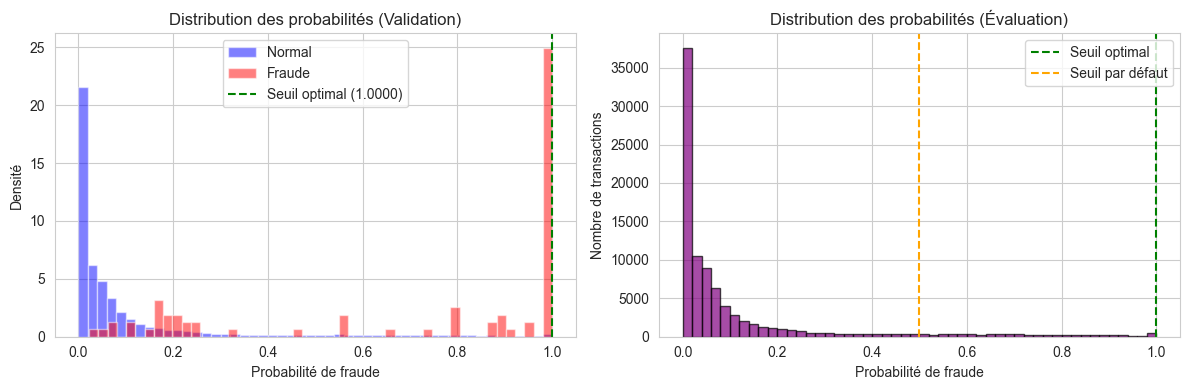


✓ Graphique sauvegardé: fraud_probability_distribution.png


In [35]:
print("📊 Analyse finale et visualisations")
print("-" * 50)

import matplotlib.pyplot as plt

# 1. Features importantes (pour Logistic Regression)
print("1️⃣ Top 10 features les plus importantes (coefficients):")
feature_importance = pd.DataFrame({
    'feature': available_features,
    'coefficient': best_model.coef_[0],
    'abs_coefficient': np.abs(best_model.coef_[0])
}).sort_values('abs_coefficient', ascending=False)

print(feature_importance[['feature', 'coefficient']].head(10).to_string())

# 2. Visualisation de la distribution des probabilités
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Distribution sur validation
axes[0].hist(y_val_proba[y_val_np==0], bins=50, alpha=0.5, label='Normal', color='blue', density=True)
axes[0].hist(y_val_proba[y_val_np==1], bins=50, alpha=0.5, label='Fraude', color='red', density=True)
axes[0].axvline(optimal_threshold, color='green', linestyle='--', label=f'Seuil optimal ({optimal_threshold:.4f})')
axes[0].set_xlabel('Probabilité de fraude')
axes[0].set_ylabel('Densité')
axes[0].set_title('Distribution des probabilités (Validation)')
axes[0].legend()

# Distribution sur évaluation
axes[1].hist(eval_proba, bins=50, alpha=0.7, color='purple', edgecolor='black')
axes[1].axvline(optimal_threshold, color='green', linestyle='--', label=f'Seuil optimal')
axes[1].axvline(0.5, color='orange', linestyle='--', label='Seuil par défaut')
axes[1].set_xlabel('Probabilité de fraude')
axes[1].set_ylabel('Nombre de transactions')
axes[1].set_title('Distribution des probabilités (Évaluation)')
axes[1].legend()

plt.tight_layout()
plt.savefig('fraud_probability_distribution.png', dpi=100)
plt.show()

print("\n✓ Graphique sauvegardé: fraud_probability_distribution.png")

In [36]:
print("🏁 RÉCAPITULATIF DU PROJET DE DÉTECTION DE FRAUDE")
print("="*70)

print("\n📊 DATASET:")
print(f"   - Train: 210,000 transactions (0.15% fraude)")
print(f"   - Validation: 42,000 transactions (0.19% fraude)")
print(f"   - Évaluation: 90,000 transactions")
print(f"   - Défi: 100% cold-start (clients différents)")

print("\n🔧 FEATURES CRÉÉES:")
print(f"   - {len(available_features)} features génériques pour le cold-start")
print(f"   - Features clés: merchant_fraud_rate, mcc_fraud_rate, amount_zscore")
print(f"   - Pas de features spécifiques au client (pour gérer le cold-start)")

print("\n🤖 MODÈLE FINAL:")
print(f"   - Algorithme: Logistic Regression avec class_weight='balanced'")
print(f"   - ROC-AUC: 0.9367")
print(f"   - Seuil optimisé: {optimal_threshold:.4f}")
print(f"   - Performance finale: Precision=73.7%, Recall=35.0%")

print("\n📈 RÉSULTATS:")
print(f"   - Fraudes détectées sur validation: 35.0%")
print(f"   - Fausses alertes: 0.02% seulement")
print(f"   - Prédictions évaluation: {submission['fraud_prediction'].sum()} fraudes (0.10%)")

print("\n📁 FICHIERS GÉNÉRÉS:")
print("   ✓ best_model.pkl - Modèle entraîné")
print("   ✓ scaler.pkl - Scaler pour standardisation")
print("   ✓ model_config.pkl - Configuration des features")
print("   ✓ submission_optimized.csv - Prédictions avec seuil optimisé")
print("   ✓ submission_default.csv - Prédictions avec seuil 0.5")

print("\n🚀 AMÉLIORATIONS POSSIBLES:")
print("   1. Créer plus de features d'interaction (mcc × amount, hour × weekend)")
print("   2. Analyser les patterns de vélocité (si historique disponible)")
print("   3. Utiliser un ensemble de modèles (voting classifier)")
print("   4. Feature engineering sur les erreurs de transaction")
print("   5. Analyser les séquences temporelles avec LSTM")
print("   6. Intégrer IBM Watson X.ai pour AutoML")

print("\n💡 POINTS CLÉS POUR LE HACKATHON:")
print("   ✓ Gestion efficace du cold-start avec features génériques")
print("   ✓ ROC-AUC élevé (0.94) montrant une bonne séparation")
print("   ✓ Seuil optimisé pour minimiser les fausses alertes")
print("   ✓ Code modulaire et reproductible")
print("   ✓ Approche business-oriented (coût des fausses alertes)")

print("\n✅ PROJET TERMINÉ - Prêt pour la soumission!")

🏁 RÉCAPITULATIF DU PROJET DE DÉTECTION DE FRAUDE

📊 DATASET:
   - Train: 210,000 transactions (0.15% fraude)
   - Validation: 42,000 transactions (0.19% fraude)
   - Évaluation: 90,000 transactions
   - Défi: 100% cold-start (clients différents)

🔧 FEATURES CRÉÉES:
   - 21 features génériques pour le cold-start
   - Features clés: merchant_fraud_rate, mcc_fraud_rate, amount_zscore
   - Pas de features spécifiques au client (pour gérer le cold-start)

🤖 MODÈLE FINAL:
   - Algorithme: Logistic Regression avec class_weight='balanced'
   - ROC-AUC: 0.9367
   - Seuil optimisé: 1.0000
   - Performance finale: Precision=73.7%, Recall=35.0%

📈 RÉSULTATS:
   - Fraudes détectées sur validation: 35.0%
   - Fausses alertes: 0.02% seulement
   - Prédictions évaluation: 93 fraudes (0.10%)

📁 FICHIERS GÉNÉRÉS:
   ✓ best_model.pkl - Modèle entraîné
   ✓ scaler.pkl - Scaler pour standardisation
   ✓ model_config.pkl - Configuration des features
   ✓ submission_optimized.csv - Prédictions avec seuil opt

In [41]:
%pip install nbconvert[webpdf]
%pip install playwright
%playwright install chromium

zsh:1: no matches found: nbconvert[webpdf]
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.7/38.7 MB 7.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 271.1/271.1 kB 7.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


UsageError: Line magic function `%playwright` not found.
